In [5]:
import numpy as np
import matplotlib.pyplot as plt


50


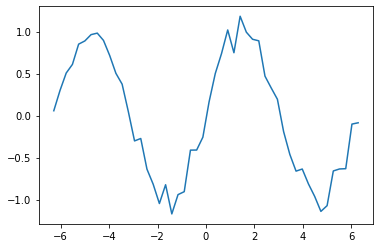

In [10]:
sin_x = np.linspace(-2*np.pi, 2*np.pi)  # -2πから2πまで
sin_y = np.sin(sin_x)  + 0.1*np.random.randn(len(sin_x))  # sin関数に乱数でノイズを加える
plt.plot(sin_x, sin_y)
plt.show()

In [18]:
import torch
from torch.utils.data import DataLoader

n_time = 10  # 時系列の数
n_sample = len(sin_x)-n_time  # サンプル数

input_data = np.zeros((n_sample, n_time, 1))  # 入力
correct_data = np.zeros((n_sample, 1))  # 正解
for i in range(n_sample):
    input_data[i] = sin_y[i:i+n_time].reshape(-1, 1)
    print(i,input_data[i])
    correct_data[i] = sin_y[i+n_time:i+n_time+1]  # 正解は入力よりも一つ後
    print(i,correct_data[i])

input_data = torch.tensor(input_data, dtype=torch.float)  # テンソルに変換
correct_data = torch.tensor(correct_data, dtype=torch.float)
dataset = torch.utils.data.TensorDataset(input_data, correct_data)  # データセットの作成
train_loader = DataLoader(dataset, batch_size=8, shuffle=True)  # DataLoaderの設定
print(train_loader)

0 [[0.05813329]
 [0.29960712]
 [0.50728053]
 [0.60998409]
 [0.85112889]
 [0.88921532]
 [0.96430035]
 [0.98223573]
 [0.89553545]
 [0.71556413]]
0 [0.5036596]
1 [[0.29960712]
 [0.50728053]
 [0.60998409]
 [0.85112889]
 [0.88921532]
 [0.96430035]
 [0.98223573]
 [0.89553545]
 [0.71556413]
 [0.5036596 ]]
1 [0.37476543]
2 [[0.50728053]
 [0.60998409]
 [0.85112889]
 [0.88921532]
 [0.96430035]
 [0.98223573]
 [0.89553545]
 [0.71556413]
 [0.5036596 ]
 [0.37476543]]
2 [0.04814527]
3 [[0.60998409]
 [0.85112889]
 [0.88921532]
 [0.96430035]
 [0.98223573]
 [0.89553545]
 [0.71556413]
 [0.5036596 ]
 [0.37476543]
 [0.04814527]]
3 [-0.30088444]
4 [[ 0.85112889]
 [ 0.88921532]
 [ 0.96430035]
 [ 0.98223573]
 [ 0.89553545]
 [ 0.71556413]
 [ 0.5036596 ]
 [ 0.37476543]
 [ 0.04814527]
 [-0.30088444]]
4 [-0.27215078]
5 [[ 0.88921532]
 [ 0.96430035]
 [ 0.98223573]
 [ 0.89553545]
 [ 0.71556413]
 [ 0.5036596 ]
 [ 0.37476543]
 [ 0.04814527]
 [-0.30088444]
 [-0.27215078]]
5 [-0.63709149]
6 [[ 0.96430035]
 [ 0.98223573

In [13]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.rnn = nn.RNN(  # RNN層
            input_size=1,  # 入力サイズ
            hidden_size=64,  # ニューロン数
            batch_first=True,  # 入力を (バッチサイズ, 時系列の数, 入力の数) にする
        )
        self.fc = nn.Linear(64, 1)  # 全結合層

    def forward(self, x):
        y_rnn, h = self.rnn(x, None)  # hは次の時刻に渡される値、 Noneでその初期値が0に
        y = self.fc(y_rnn[:, -1, :])  # yは最後の時刻の出力
        return y

net = Net()
print(net)

Net(
  (rnn): RNN(1, 64, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)


Epoch: 0 Loss_Train: 0.5199686884880066


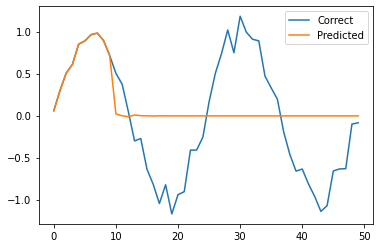

Epoch: 2 Loss_Train: 0.40128805935382844


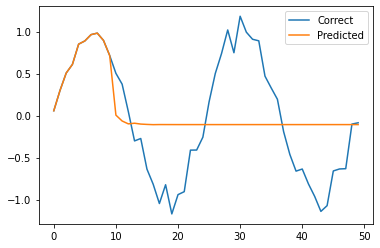

Epoch: 4 Loss_Train: 0.3290986493229866


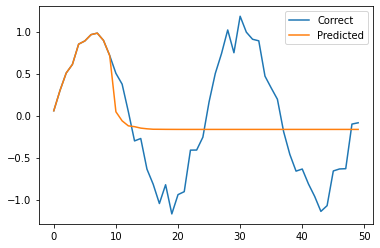

Epoch: 6 Loss_Train: 0.2794343367218971


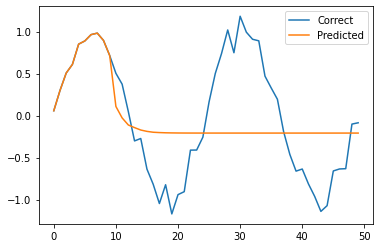

Epoch: 8 Loss_Train: 0.22708263397216796


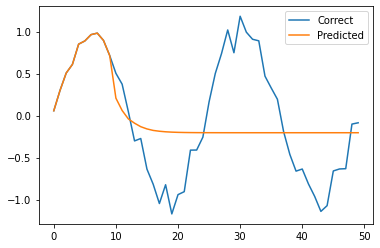

Epoch: 10 Loss_Train: 0.1864623725414276


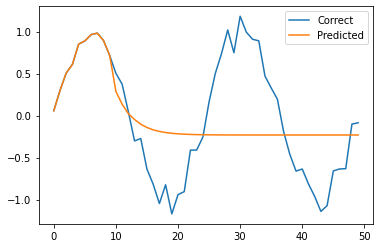

Epoch: 12 Loss_Train: 0.1563439190387726


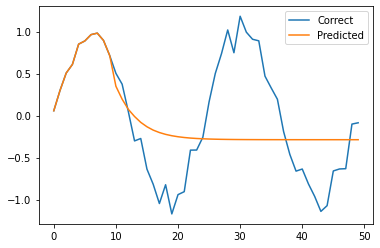

Epoch: 14 Loss_Train: 0.1381114274263382


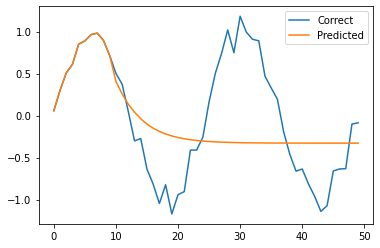

Epoch: 16 Loss_Train: 0.12313579618930817


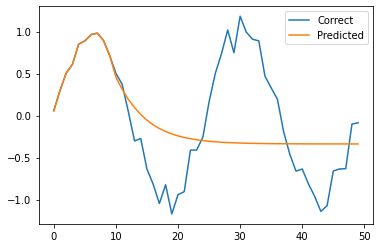

Epoch: 18 Loss_Train: 0.1114640325307846


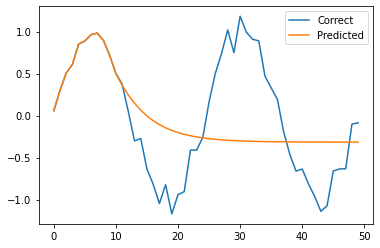

Epoch: 20 Loss_Train: 0.10353701785206795


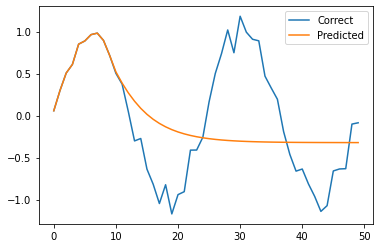

Epoch: 22 Loss_Train: 0.09552862867712975


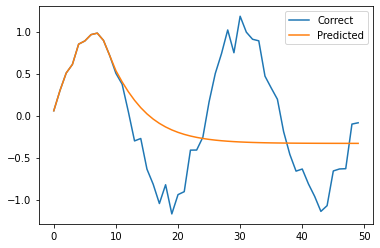

Epoch: 24 Loss_Train: 0.08869648873805999


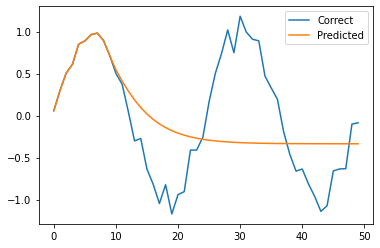

Epoch: 26 Loss_Train: 0.08239399418234825


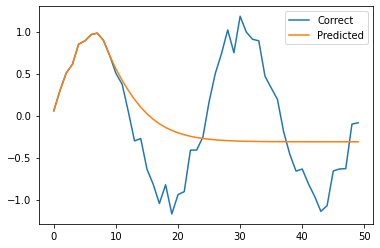

Epoch: 28 Loss_Train: 0.0762816347181797


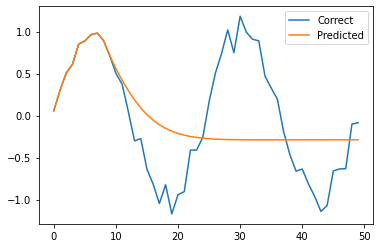

Epoch: 30 Loss_Train: 0.07057850658893586


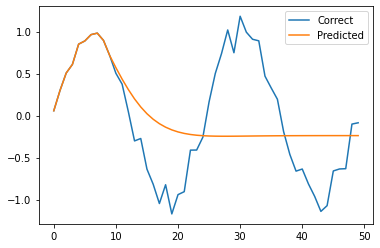

Epoch: 32 Loss_Train: 0.06474125981330872


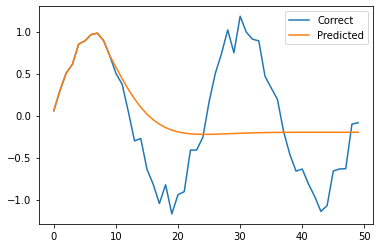

Epoch: 34 Loss_Train: 0.05889795571565628


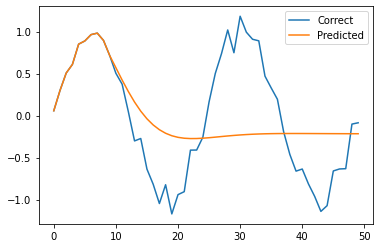

Epoch: 36 Loss_Train: 0.05357280820608139


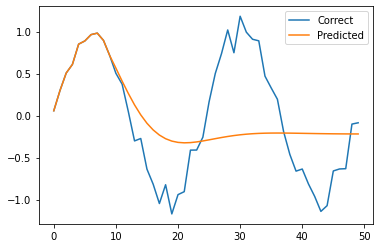

Epoch: 38 Loss_Train: 0.04811374098062515


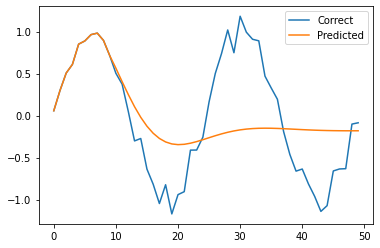

Epoch: 40 Loss_Train: 0.04297233745455742


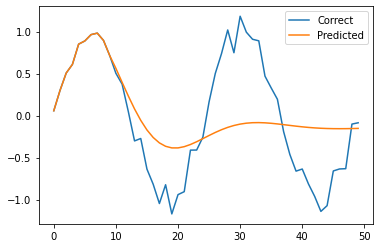

Epoch: 42 Loss_Train: 0.04031644128262997


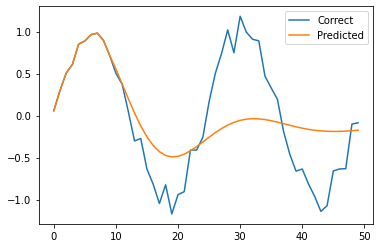

Epoch: 44 Loss_Train: 0.03433873951435089


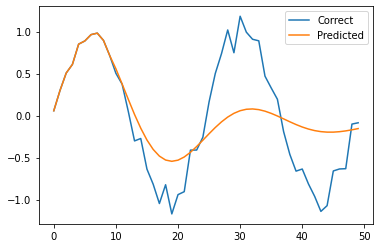

Epoch: 46 Loss_Train: 0.03149451594799757


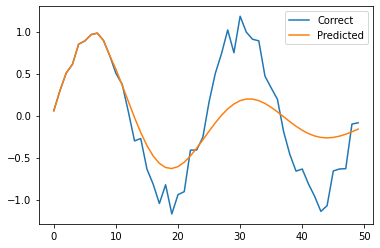

Epoch: 48 Loss_Train: 0.0287456750869751


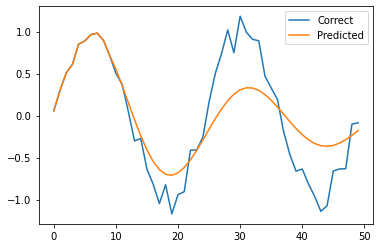

In [15]:
from torch import optim

# 平均二乗誤差関数
loss_fnc = nn.MSELoss()

# 最適化アルゴリズム
optimizer = optim.SGD(net.parameters(), lr=0.01)  # 学習率は0.01

# 損失のログ
record_loss_train = []

# 学習
for i in range(50):  # 50エポック学習
    net.train()  # 訓練モード
    loss_train = 0
    for j, (x, t) in enumerate(train_loader):  # ミニバッチ（x, t）を取り出す
        y = net(x)
        loss = loss_fnc(y, t)
        loss_train += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss_train /= j+1
    record_loss_train.append(loss_train)

    if i%2 == 0:
        print("Epoch:", i, "Loss_Train:", loss_train)
        predicted = list(input_data[0].reshape(-1)) # 最初の入力
        for i in range(n_sample):
            x = torch.tensor(predicted[-n_time:])  # 直近の時系列を取り出す
            x = x.reshape(1, n_time, 1)  # (バッチサイズ, 時系列の数, 入力の数)
            y = net(x)
            predicted.append(y[0].item())  # 予測結果をpredictedに追加する

        plt.plot(range(len(sin_y)), sin_y, label="Correct")
        plt.plot(range(len(predicted)), predicted, label="Predicted")
        plt.legend()
        plt.show()

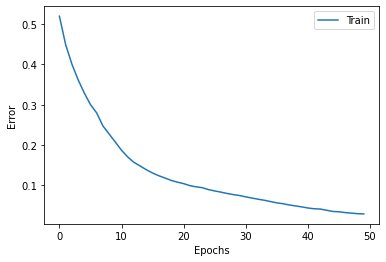

In [16]:
import matplotlib.pyplot as plt

plt.plot(range(len(record_loss_train)), record_loss_train, label="Train")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()